In [ ]:
## Setup

In [1]:
pacman::p_load("Seurat", "Azimuth", "qs", "dplyr", install = FALSE)

In [2]:
ref_obj <- qread("01_data/mouse_cell_reference_qs.Rds") # saved result of Read10X() on https://www.livercellatlas.org/data_files/toDownload/rawData_mouseStSt.zip

In [3]:
ref_obj <- CreateSeuratObject(counts = ref_obj)

In [4]:
cell_metadata <- read.csv("/research/lab_reiberger/2024-CDM24_2-12wCCl4-REG/01_data/annot_mouseStStAll.csv")

In [5]:
ref_obj[['annot']] <- cell_metadata$annot[match(rownames(ref_obj@meta.data), cell_metadata$cell)] 
ref_obj[['cluster']] <- cell_metadata$cluster[match(rownames(ref_obj@meta.data), cell_metadata$cell)] 
ref_obj[['sample']] <- cell_metadata$sample[match(rownames(ref_obj@meta.data), cell_metadata$cell)] 

In [7]:
meta_keep <- ref_obj@meta.data %>% filter(!annot == "NA")
ref_obj_subset <- ref_obj[,colnames(ref_obj) %in% rownames(meta_keep)]

In [9]:
ref_obj_subset <- SCTransform(ref_obj_subset, verbose = FALSE)
ref_obj_subset <- RunPCA(ref_obj_subset, verbose = FALSE)
ref_obj_subset <- RunUMAP(ref_obj_subset, dims = 1:30, verbose = TRUE, return.model = TRUE)

Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"
Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by 'BiocGenerics'

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by 'BiocGenerics'



Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



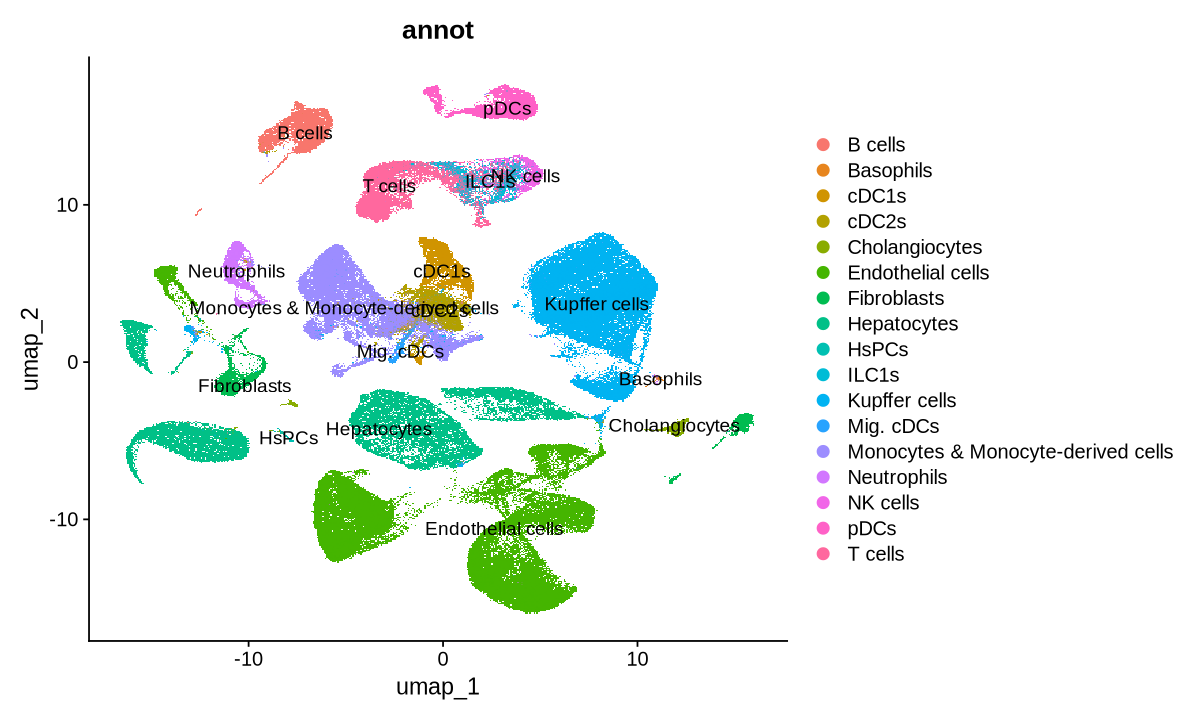

In [13]:
options(repr.plot.width=10, repr.plot.height=6)

DimPlot(ref_obj_subset, group.by = 'annot', label = TRUE)

In [20]:
ref_obj_subset

An object of class Seurat 
54920 features across 185894 samples within 2 assays 
Active assay: SCT (23867 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [15]:
colormap <- list(annot = CreateColorMap(object = ref_obj_subset, seed = 2))

In [34]:
ref <- AzimuthReference(
  object = ref_obj_subset,
  refUMAP = "umap",
  refDR = "pca",
  refAssay = "SCT",
  metadata = c("annot"),
  dims = 1:50,
  k.param = 31,
  colormap = colormap,
  reference.version = "1.0.0"
)

Warning message:
"annot is not a factor. Converting to factor with alphabetical levels."
Only one graph name supplied, storing nearest-neighbor graph only

Warning message:
"Different cells and/or features from existing assay SCT"


In [36]:
SaveAnnoyIndex(object = ref[["refdr.annoy.neighbors"]], file = "azimuth_files/idx.annoy")
saveRDS(object = ref, file = "azimuth_files/ref.Rds")